In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [6]:
data = pd.read_csv('Google_train_data.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [7]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [9]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [19]:
X_train = []
y_train = []

for i in range (60,1149):
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [20]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [12]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 10s - 278ms/step - loss: 0.0548
Epoch 2/20
35/35 - 3s - 100ms/step - loss: 0.0136
Epoch 3/20
35/35 - 3s - 94ms/step - loss: 0.0108
Epoch 4/20
35/35 - 3s - 94ms/step - loss: 0.0102
Epoch 5/20
35/35 - 3s - 91ms/step - loss: 0.0087
Epoch 6/20
35/35 - 3s - 97ms/step - loss: 0.0079
Epoch 7/20
35/35 - 5s - 148ms/step - loss: 0.0077
Epoch 8/20
35/35 - 3s - 96ms/step - loss: 0.0138
Epoch 9/20
35/35 - 3s - 95ms/step - loss: 0.0083
Epoch 10/20
35/35 - 4s - 105ms/step - loss: 0.0066
Epoch 11/20
35/35 - 4s - 101ms/step - loss: 0.0060
Epoch 12/20
35/35 - 3s - 95ms/step - loss: 0.0063
Epoch 13/20
35/35 - 5s - 138ms/step - loss: 0.0056
Epoch 14/20
35/35 - 5s - 149ms/step - loss: 0.0070
Epoch 15/20
35/35 - 4s - 126ms/step - loss: 0.0087
Epoch 16/20
35/35 - 4s - 123ms/step - loss: 0.0058
Epoch 17/20
35/35 - 4s - 106ms/step - loss: 0.0051
Epoch 18/20
35/35 - 4s - 104ms/step - loss: 0.0051
Epoch 19/20
35/35 - 4s - 110ms/step - loss: 0.0054
Epoch 20/20
35/35 - 4s - 115ms/step - loss: 0.

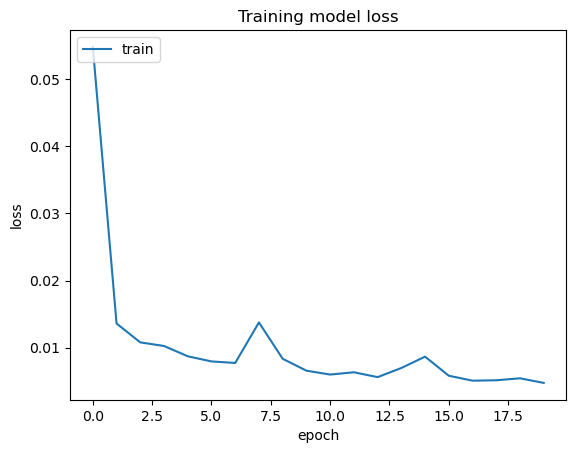

In [14]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [15]:
testData = pd.read_csv('Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 

inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [16]:
y_pred = model.predict(X_test)
y_pred

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


array([[1.179498 ],
       [1.1812774],
       [1.1905257],
       [1.206096 ],
       [1.2217966],
       [1.2289026],
       [1.2249315],
       [1.213617 ],
       [1.2030312],
       [1.1967397],
       [1.1883893],
       [1.1768084],
       [1.1653239],
       [1.1542186],
       [1.1482592],
       [1.1482354],
       [1.1597672],
       [1.182365 ],
       [1.2122856],
       [1.2457943],
       [1.2683318],
       [1.2774241],
       [1.2697657],
       [1.2493335],
       [1.2246997],
       [1.2042208],
       [1.1912726],
       [1.1826088],
       [1.1717746],
       [1.1593006],
       [1.1462828],
       [1.1322854],
       [1.1136583],
       [1.0907974],
       [1.0767026],
       [1.0775144],
       [1.0911705],
       [1.1121532],
       [1.1364106],
       [1.155187 ],
       [1.1734884],
       [1.1928289],
       [1.213392 ],
       [1.2329452],
       [1.2482868],
       [1.2554746],
       [1.2520016],
       [1.2451628],
       [1.240198 ],
       [1.2403768],


In [17]:
predicted_price = sc.inverse_transform(y_pred)

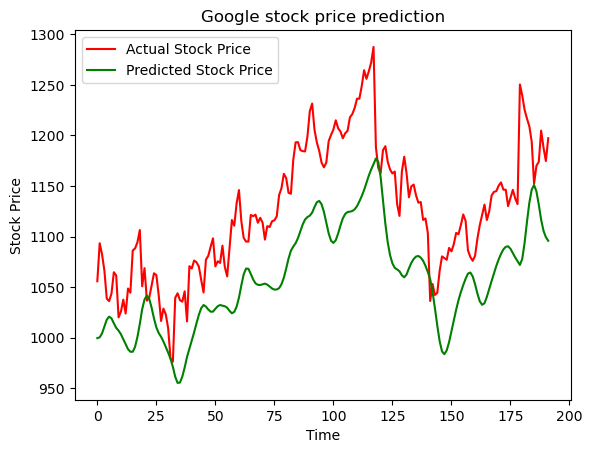

In [18]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()